In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt # https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot

%matplotlib inline

from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format='retina' # set_matplotlib_formats("retina") 

print(f"{np.__version__}")
print(f"{mpl.__version__}")

1.23.5
3.7.1


In [3]:
stock_df = pd.read_csv("../data/prices.csv")
stock_df.shape # (851264, 7)
stock_df.sample(5)

,date,symbol,open,close,low,high,volume
548922,2014-08-01,TRV,89.470001,89.610001,89.070000,90.029999,2234100.0
437075,2013-09-05,KEY,11.700000,11.840000,11.690000,11.940000,10870700.0
200721,2011-09-13,CHK,30.900002,31.489998,30.669999,31.860001,12318000.0
392459,2013-04-25,SRE,81.860001,81.519997,81.000000,81.919998,1041400.0
525730,2014-05-27,LKQ,28.379999,28.660000,28.250000,28.700001,1459600.0


In [4]:
stock_df["date"] = pd.to_datetime(stock_df["date"], format="%Y-%m-%d", errors="raise")
stock_df.set_index("date", inplace=True)
stock_df.sample(5)

,symbol,open,close,low,high,volume
date,,,,,,
2014-09-26,NEM,23.900000,23.809999,23.510000,23.900000,3973000.0
2014-06-27,MON,125.300003,125.000000,124.860001,125.980003,3915300.0
2016-02-18,APC,40.849998,37.029999,36.930000,41.160000,11708000.0
2016-04-28,DPS,89.970001,90.610001,89.529999,91.120003,1554600.0
2014-05-05,AVGO,63.869999,64.250000,63.020000,64.449997,1352900.0


In [5]:
apple_df = stock_df[stock_df["symbol"] == "AAPL"]
google_df = stock_df[stock_df["symbol"] == "GOOG"]

## line plot  

- 시간, 순서에 대한 변화에 적합함.
- 관측값(점)을 선으로 연결한 것이므로 보간(interpolation)이다. 그래서 추세를 보기에는 좋지만 엄밀한 데이터 분석에는 적합하지 않다.
  - line은 직선보다는 곡선.
    - moving average
    - smooth curve with scipy
      - scipy.iterpolate.make_interp_spline()
      - scipy.interpolate.interp1d()
      - scipy.ndimage.gaussian_filter1d()
- 추세를 보기 위한 그래프이므로 grid, annotate 등은 생략하고 그래프만 표현하는 것이 좋음. 클린한게 좋음. 
  - 그래도 legend, min, max 정도는 해줘야
- 추세를 보므로 x축의 간격이 중요함. 혹시라도 x축의 간격이 규칙적이지 않다면 관측값에 점을 찍어야
- 2중 축은 지양할 것. 그냥 plot을 하나 더 그리는 것이 나음. 둘 그래프 사이에 별 관련이 없는데 관련이 있어 보이게 만듦  

### basic

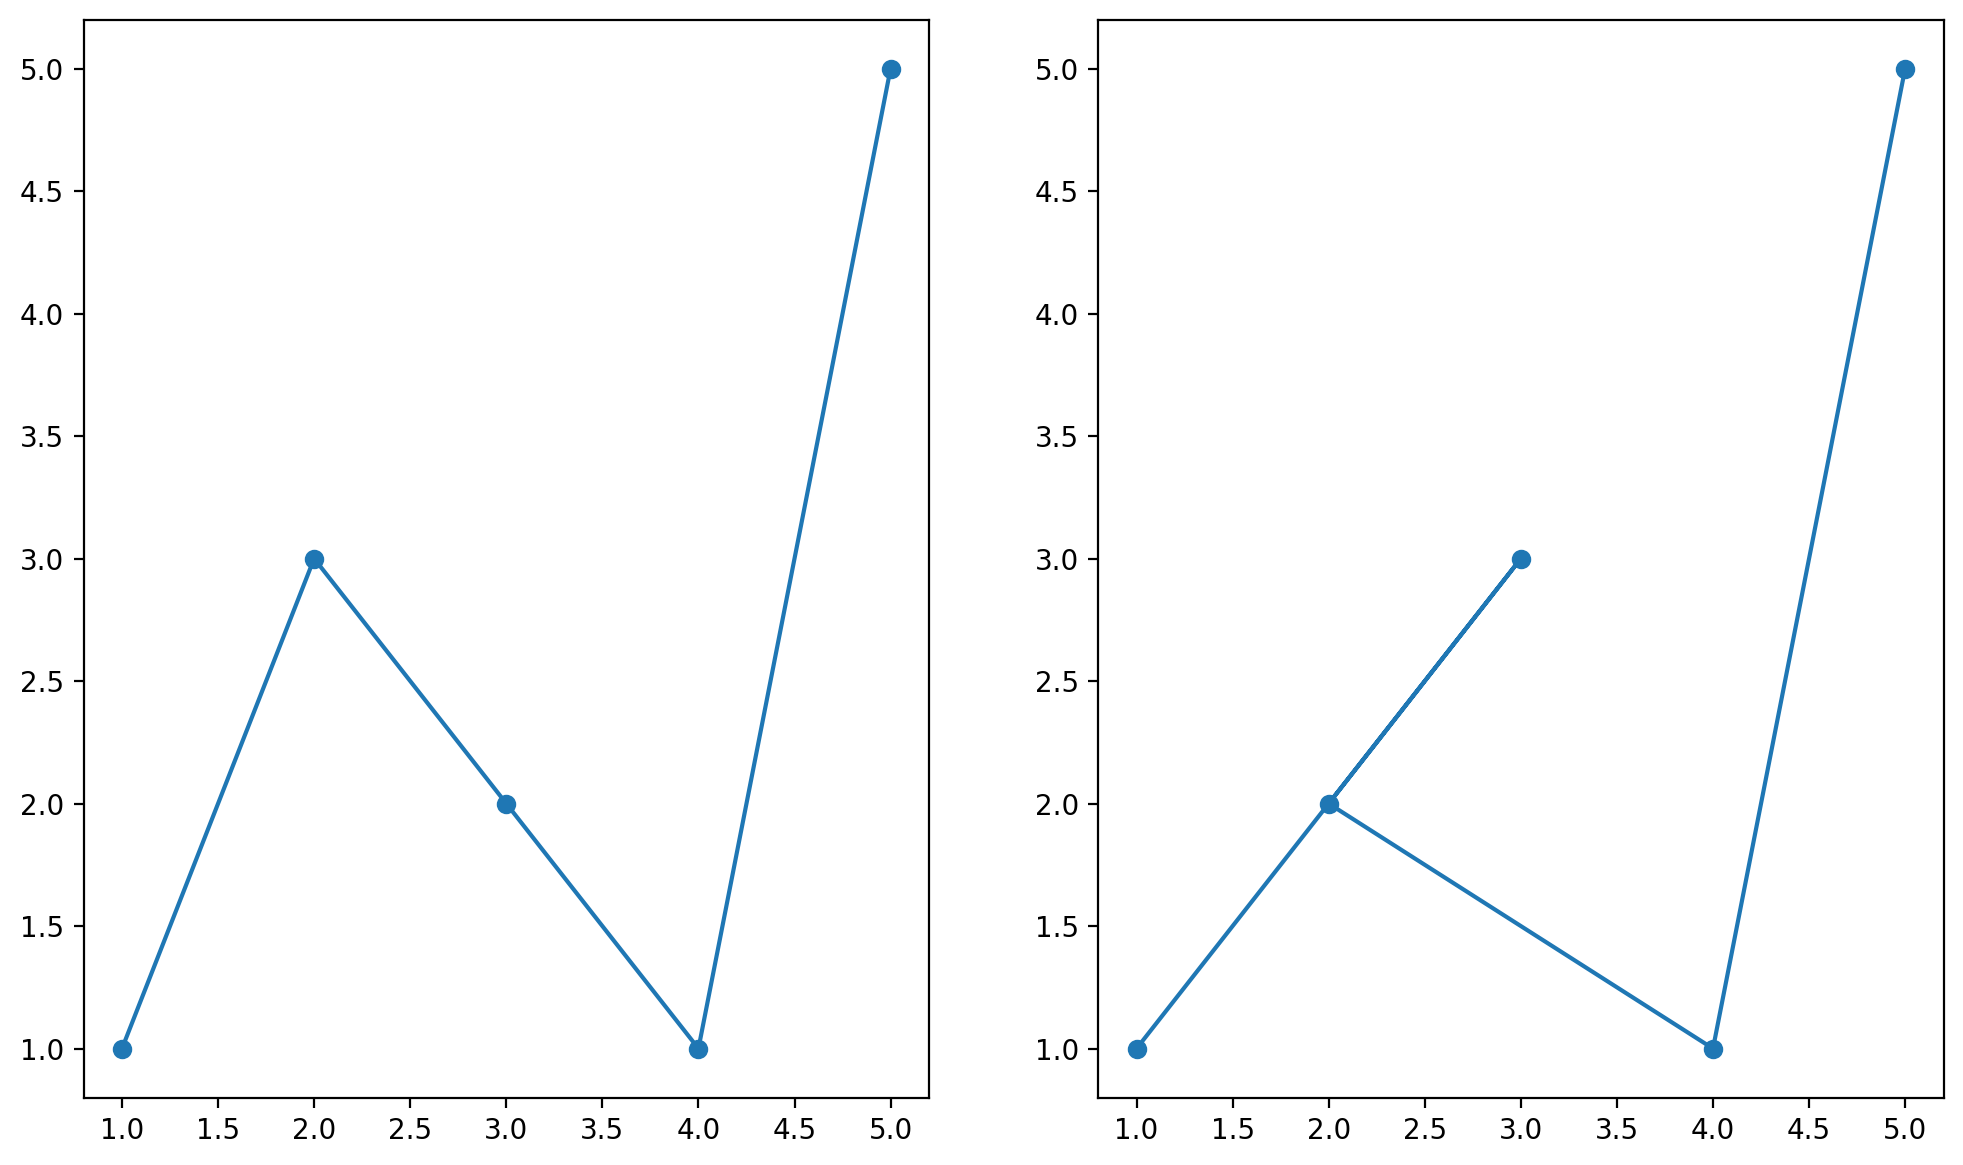

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))

x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([1, 3, 2, 4, 5]) # 순서가 달라서 망가짐.
y = np.array([1, 3, 2, 1, 5])

ax[0].plot(x1, y, "o-")
ax[1].plot(x2, y, "o-")

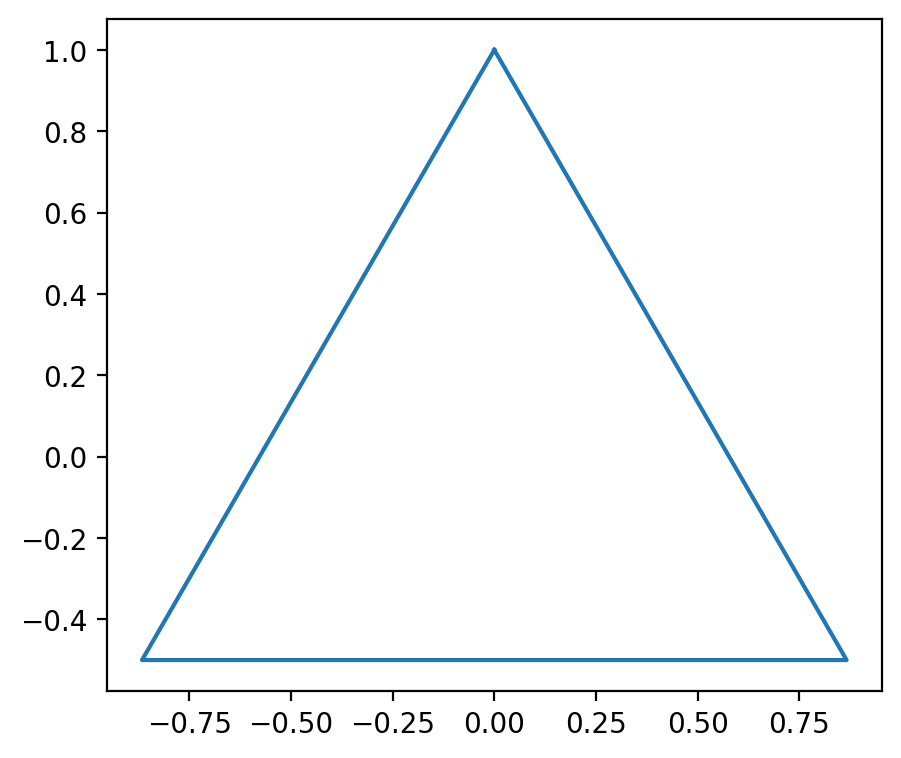

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

x = np.sin(np.linspace(0, 2 * np.pi, 4))
y = np.cos(np.linspace(0, 2 * np.pi, 4))
ax.set_aspect(1)

ax.plot(x, y)

### mark, linestyle, color  

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#examples-using-matplotlib-pyplot-plot

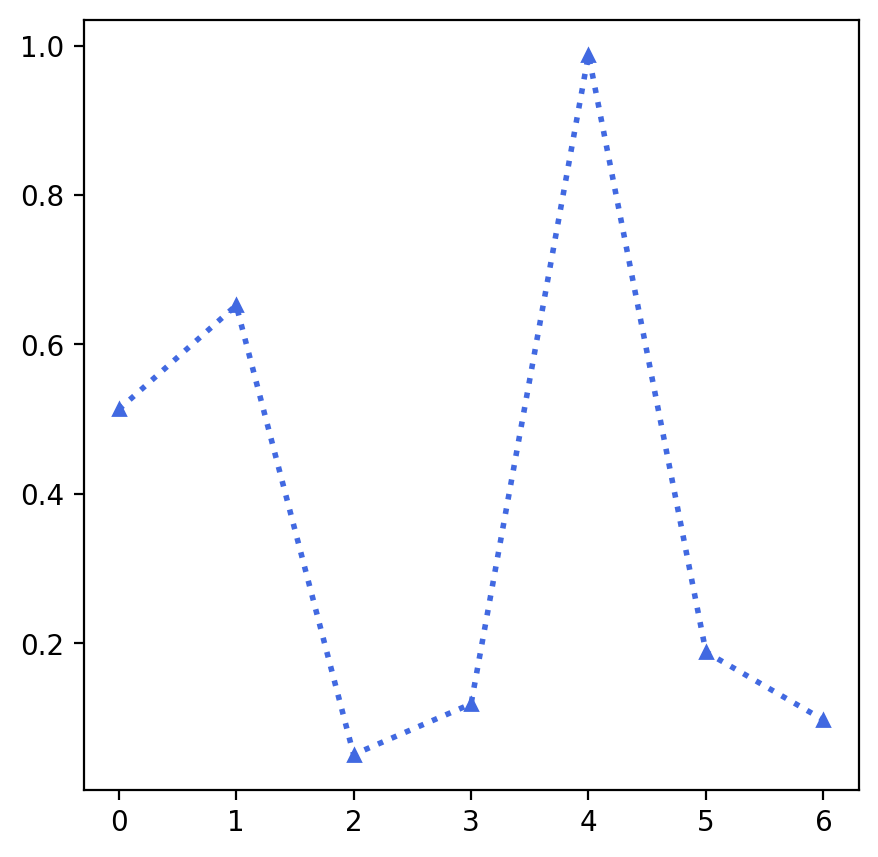

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

x = np.arange(7)
y = np.random.rand(7)

ax.plot(x, y, 
        color="royalblue", 
        marker="^", 
        linestyle="dotted",  
        linewidth=2,
        markersize=4
)

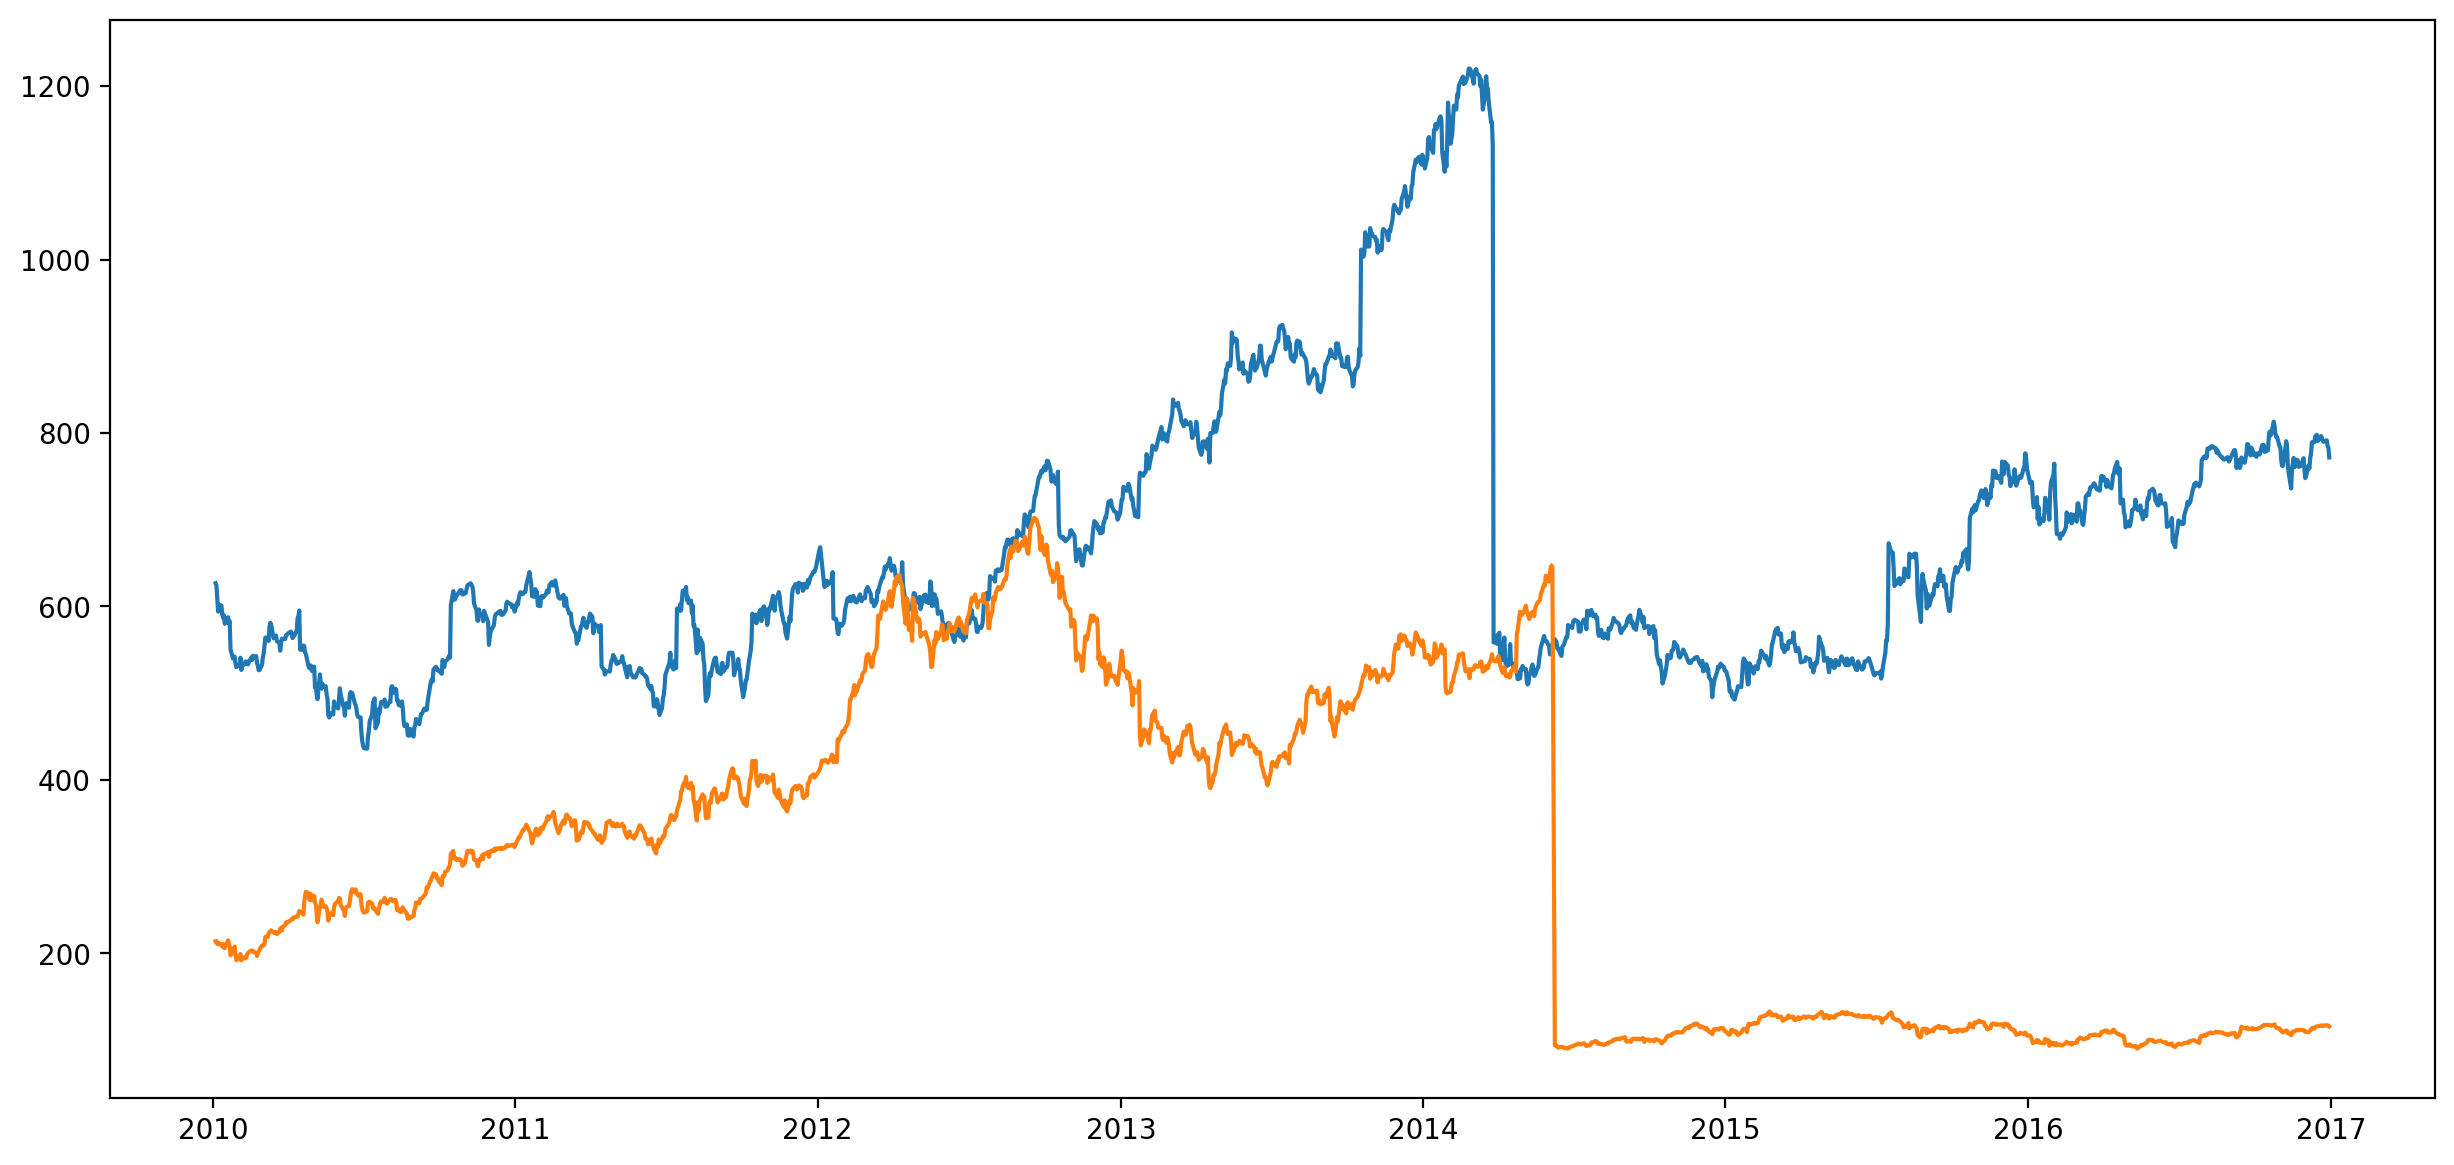

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

ax.plot(google_df.index, google_df["close"])
ax.plot(apple_df.index, apple_df["close"])

### rolling(이동 평균)을 통한 smoothing

/var/folders/z0/9n2_5pyx1gz3mn_3mt7831qm0000gn/T/ipykernel_23275/3205914198.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['symbol'], dtype='object')
  google_rolling_df = google_df.rolling(window=4).mean()


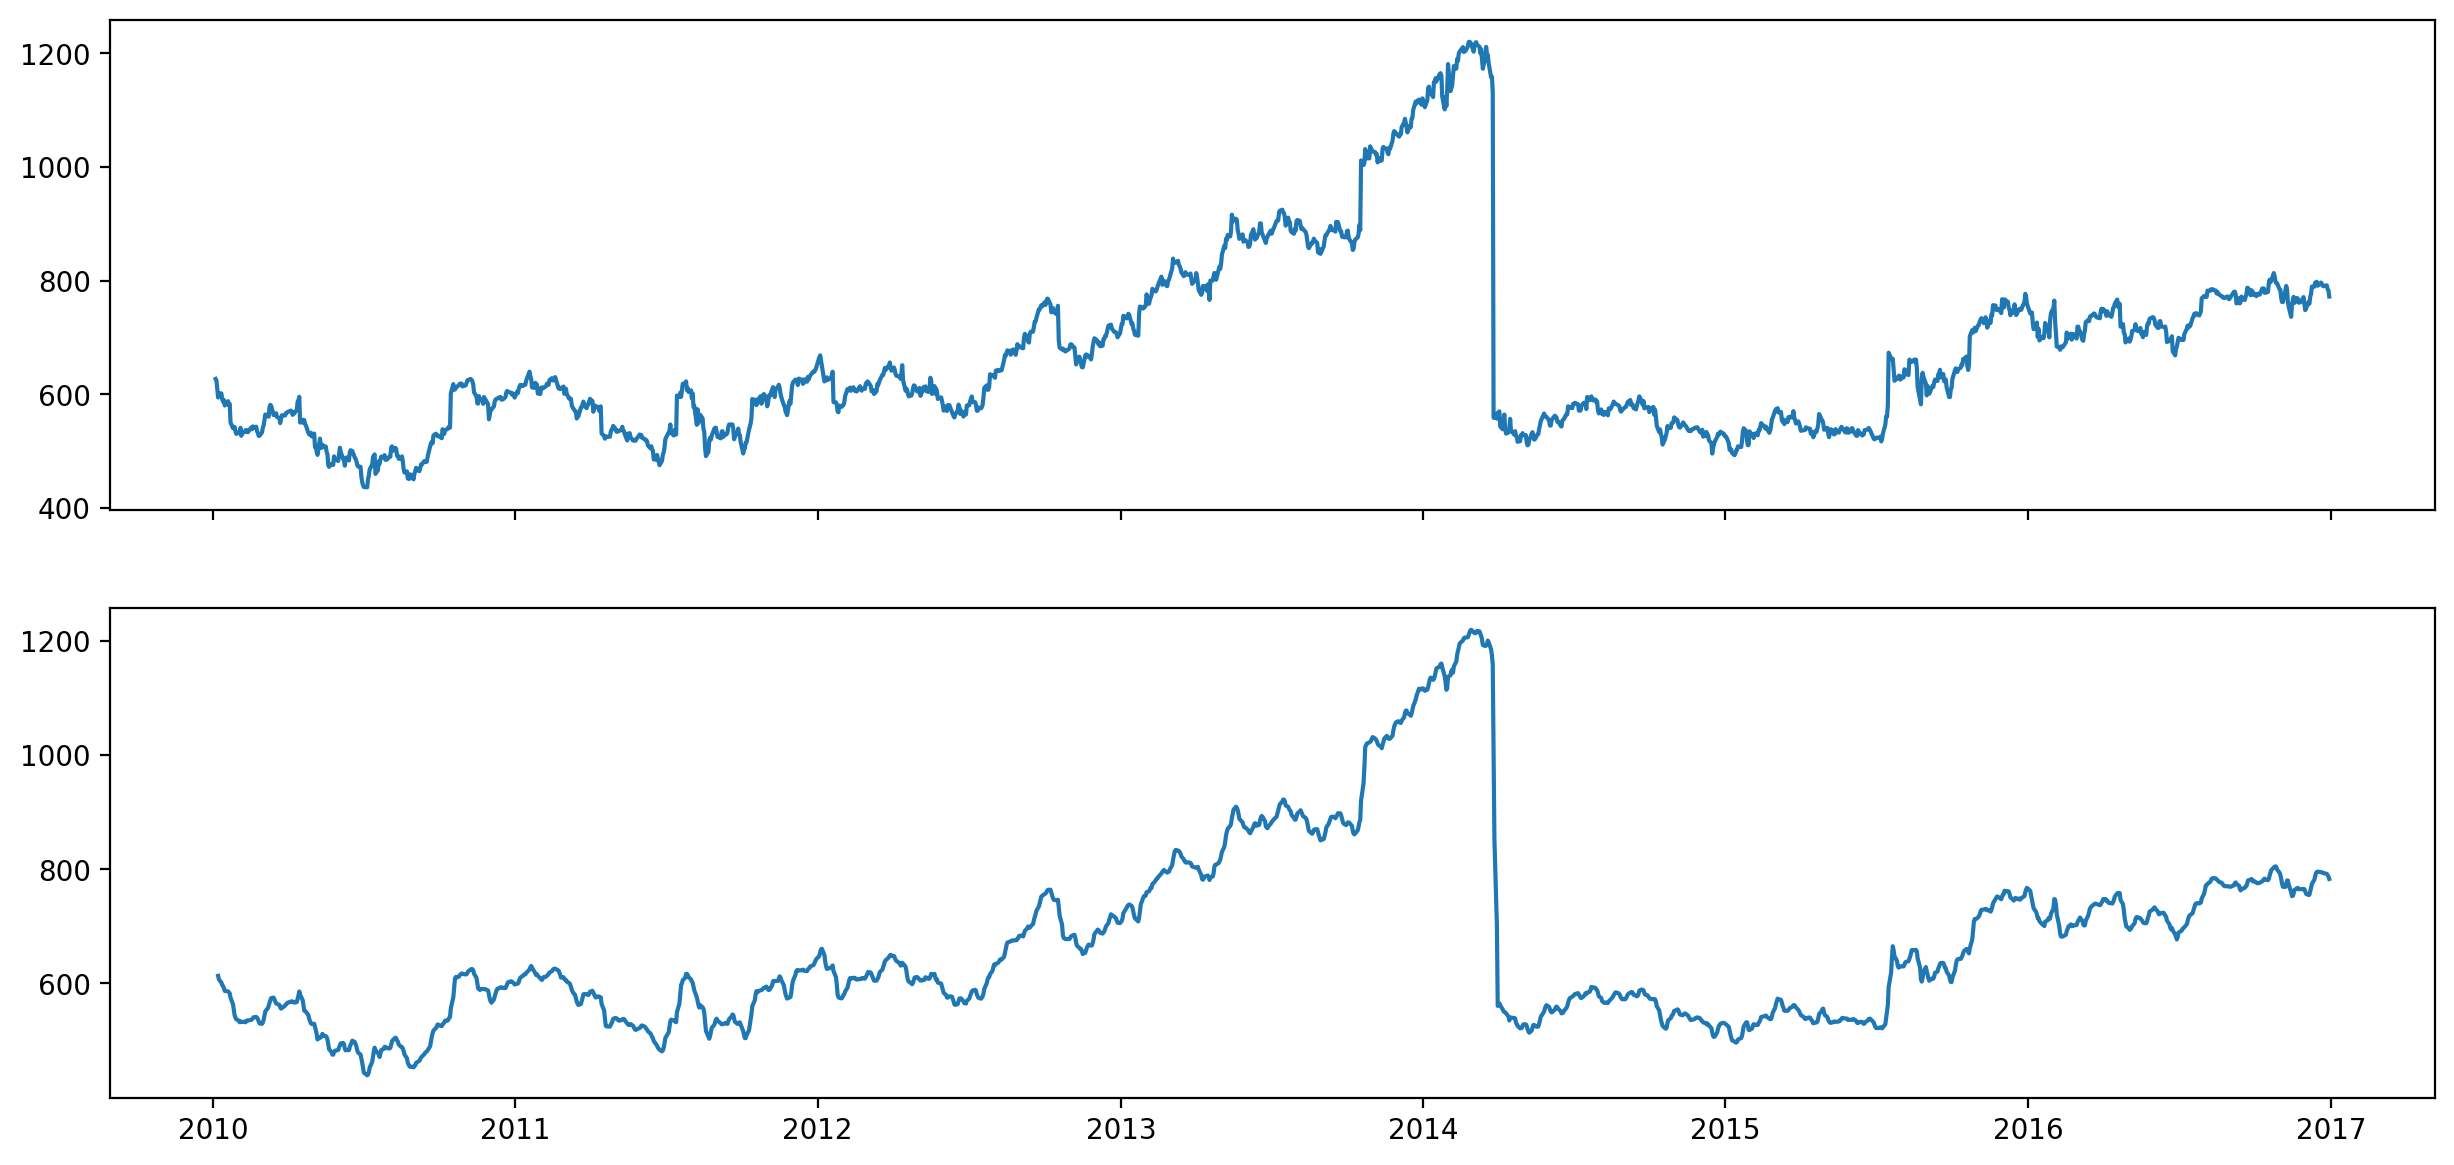

In [17]:
# 이동 평균
google_rolling_df = google_df.rolling(window=4).mean()

fig, ax = plt.subplots(2, 1, figsize=(15, 7), sharex=True)

ax[0].plot(google_df.index, google_df["close"])
ax[1].plot(google_rolling_df.index, google_rolling_df["close"]) # 더 부드럽게 그려짐

## 좀 더 자세하게 line chart 그리기

### 정보가 많은 line chart와 정보가 적은 line chart

- 필요한대로 마음대로 하면 됨.

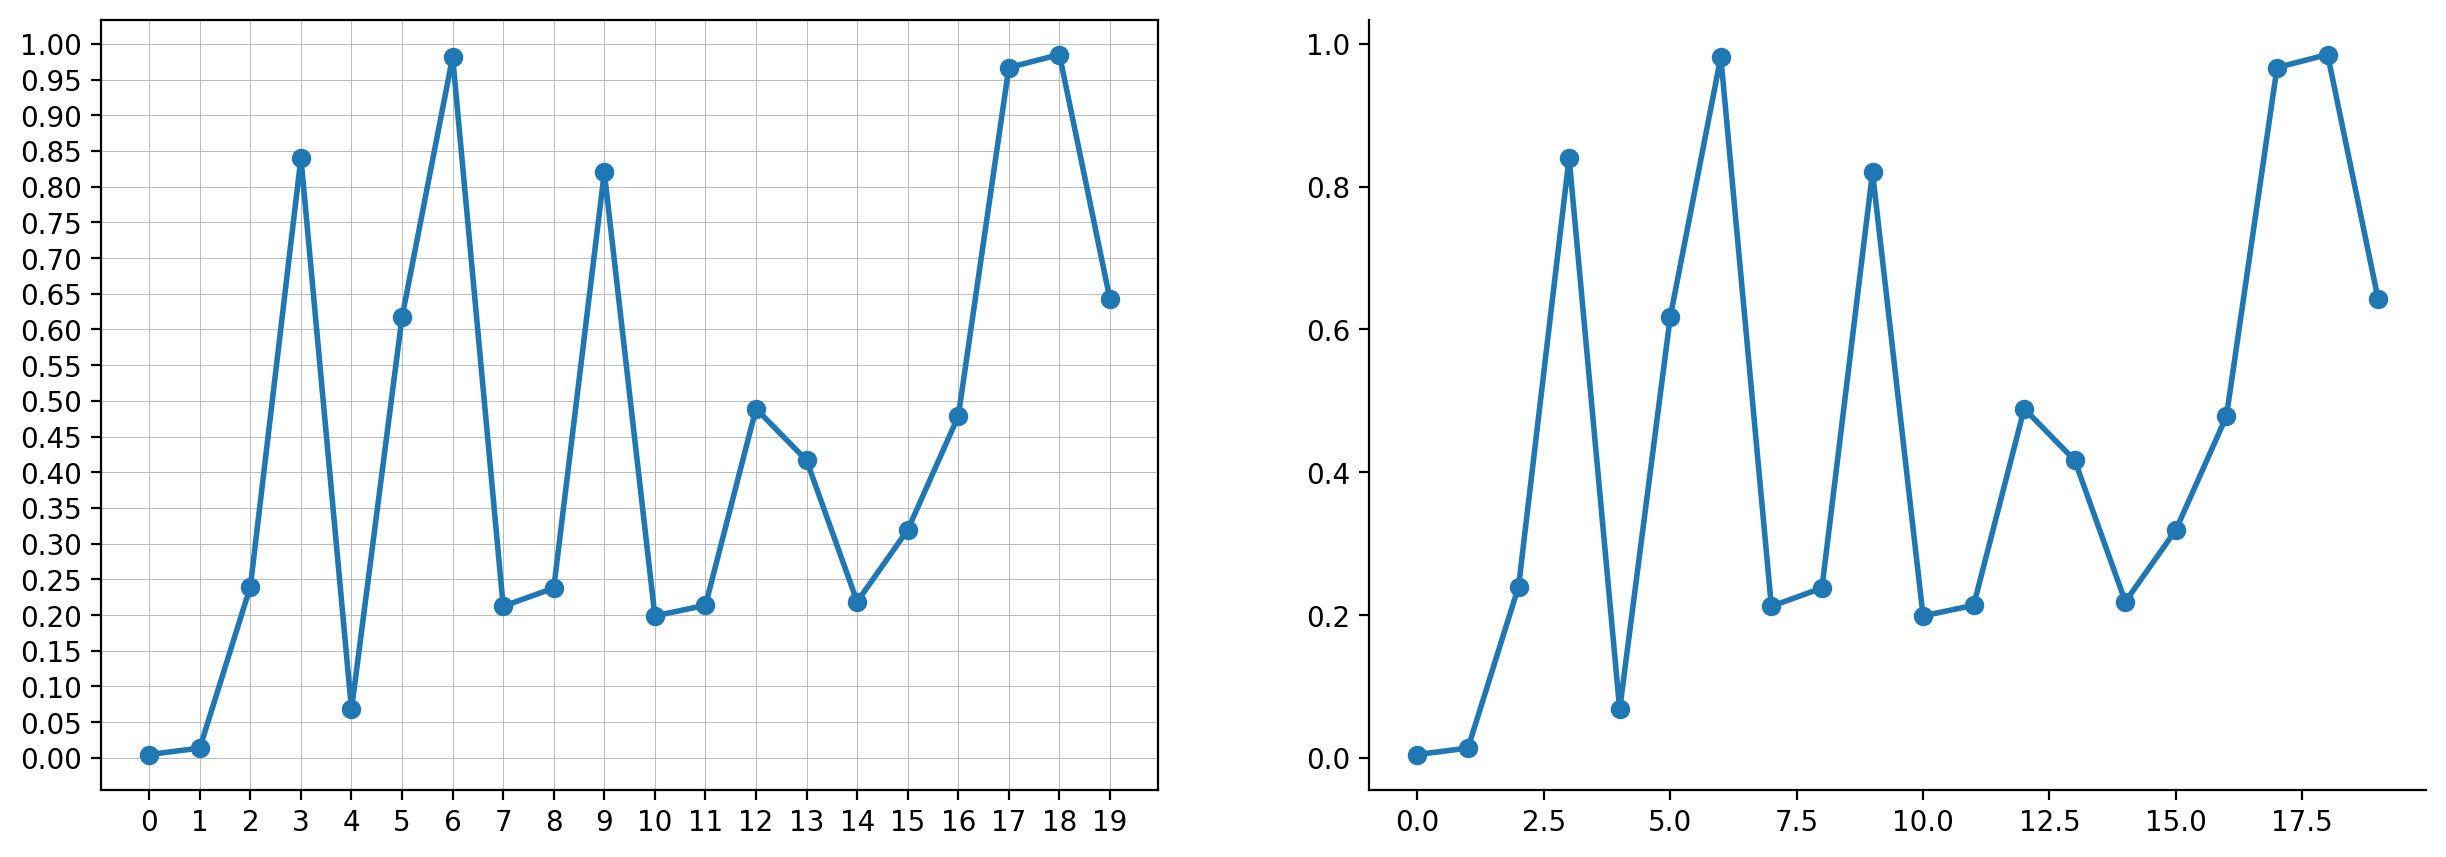

In [19]:
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize=(15, 5))

x = np.arange(20)
y = np.random.rand(20)

# ax1 (정보 많음)
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x, y, marker="o", linewidth=2)

# MultipleLocator : Set a tick on each integer multiple of the *base* within the view interval.
ax1.xaxis.set_major_locator(MultipleLocator(1)) 
ax1.yaxis.set_major_locator(MultipleLocator(0.05))
ax1.grid(linewidth=0.3)

# ax2 (정보 적음)
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(x, y, marker="o", linewidth=2)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

### 보간

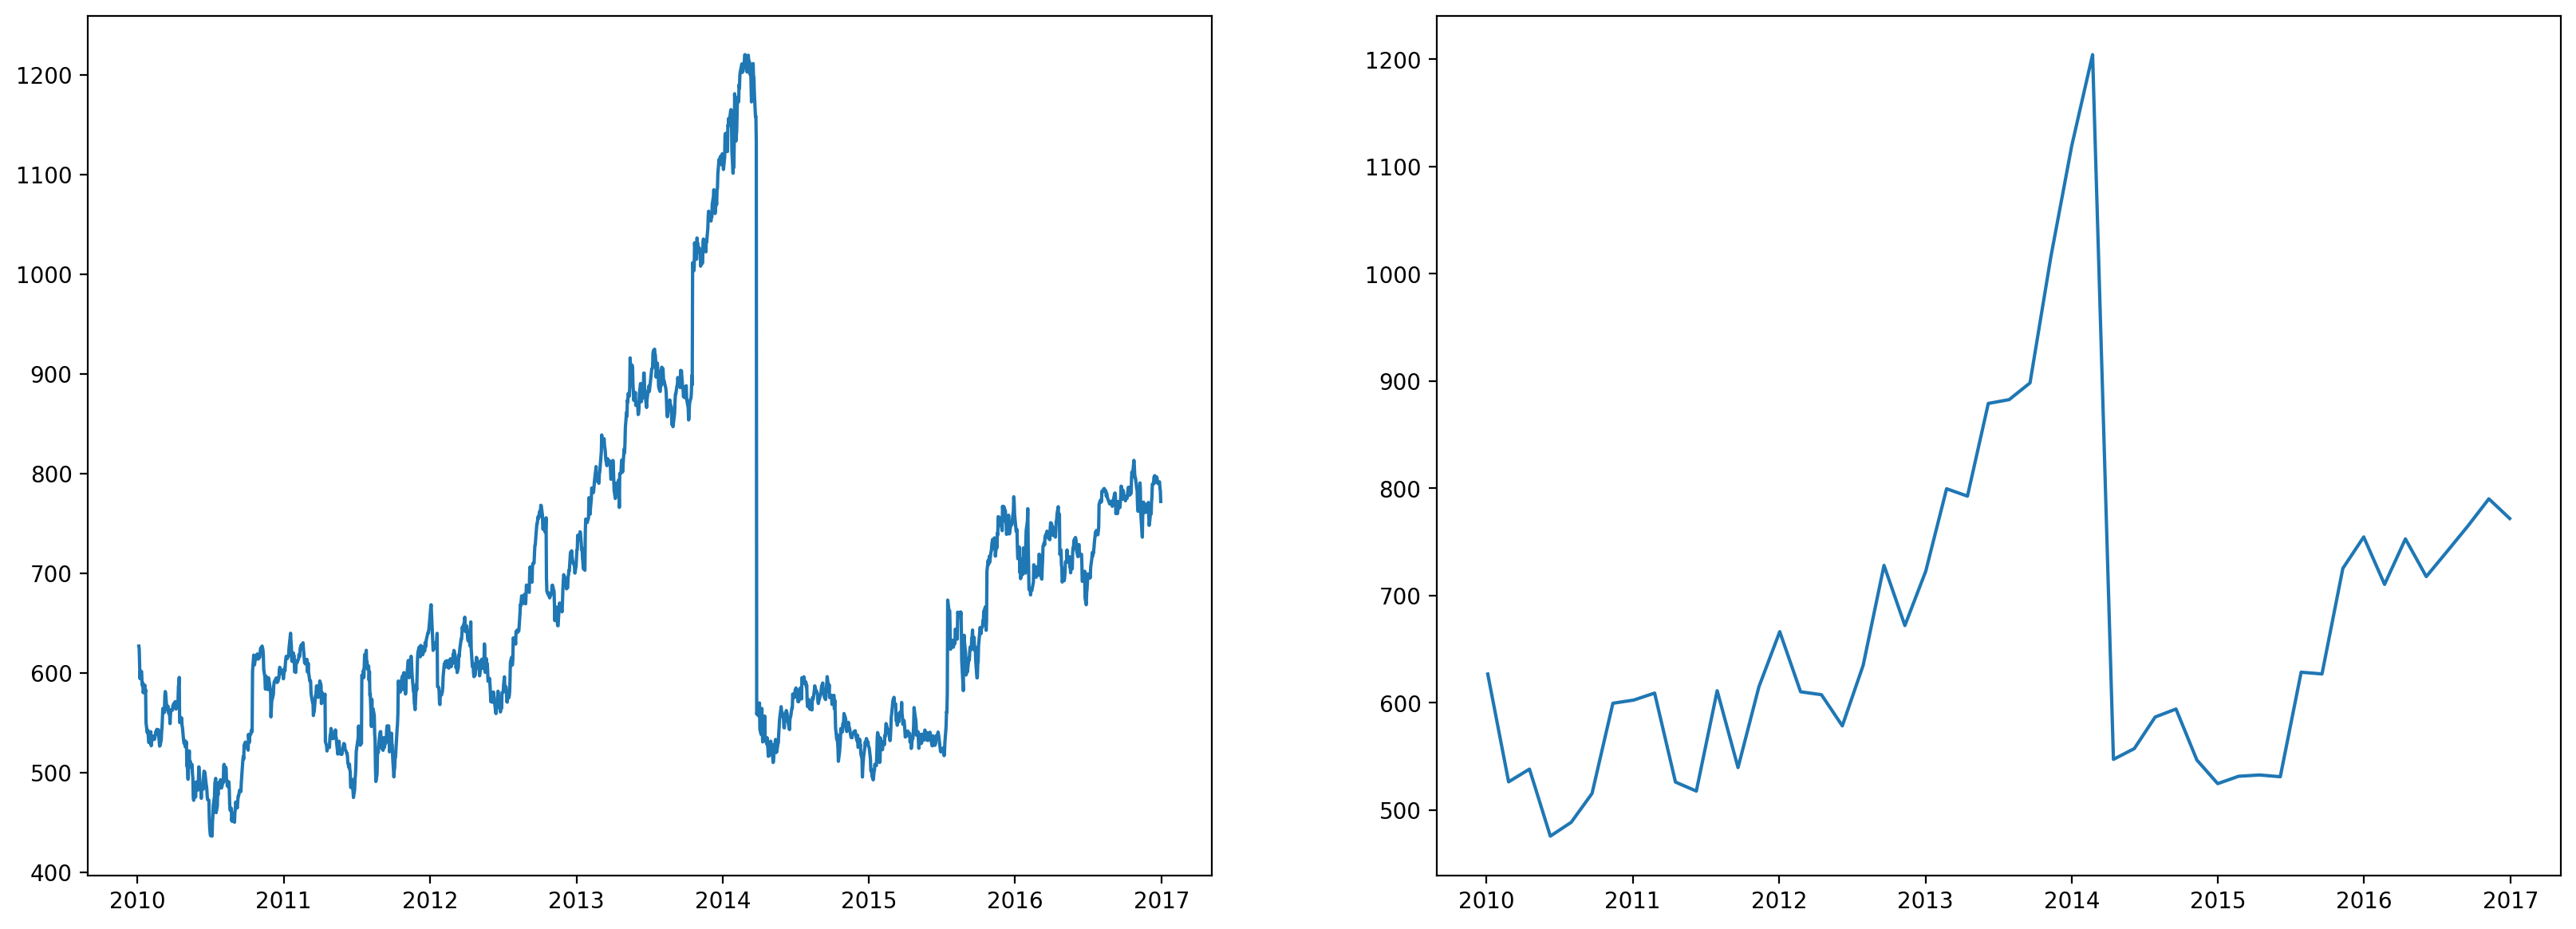

In [22]:
from scipy.interpolate import make_interp_spline, interp1d
import matplotlib.dates as dates

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

date_np = google_df.index
value_np = google_df['close']

date_num = dates.date2num(date_np)

# smooth
date_num_smooth = np.linspace(date_num.min(), date_num.max(), 50) 
spl = make_interp_spline(date_num, value_np, k=3)
value_np_smooth = spl(date_num_smooth)

# print
ax[0].plot(date_np, value_np)
ax[1].plot(dates.num2date(date_num_smooth), value_np_smooth)

### 이중 축. (권장하지 않음)

- twinx
- secondary-xaxis : https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html  

Text(0.0, 1.0, 'Google Close Price & Volume')

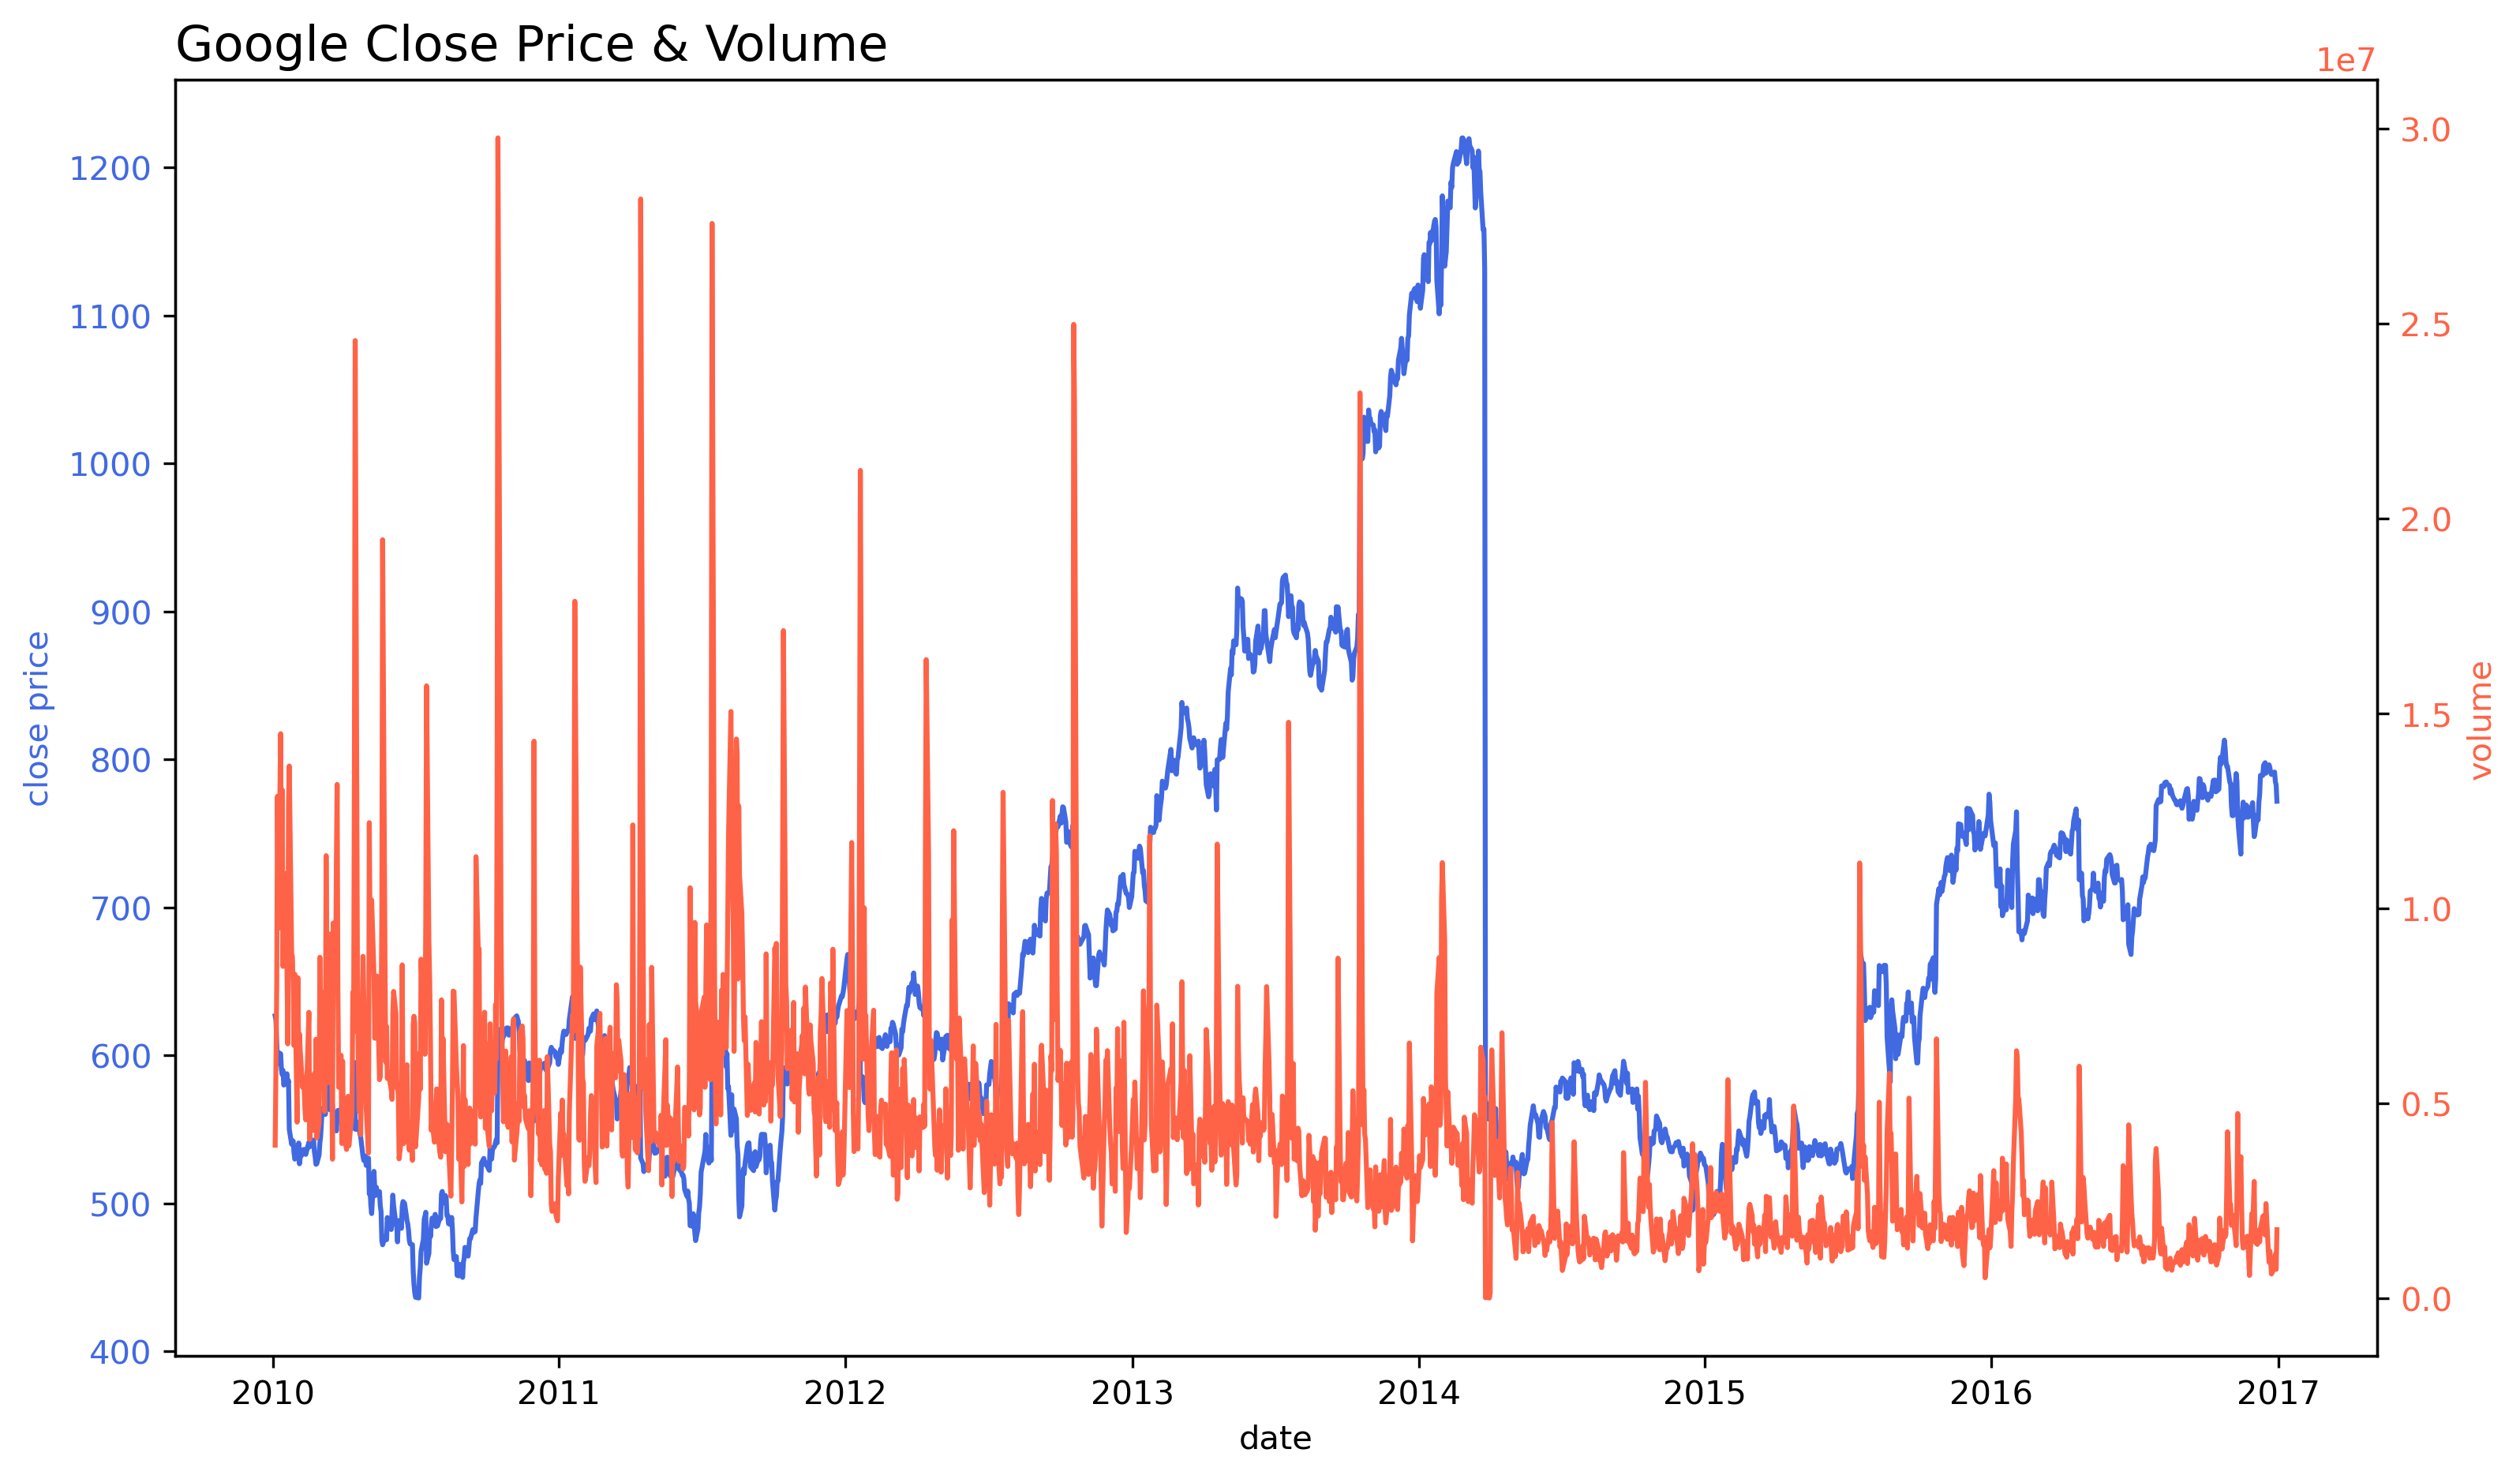

In [27]:
fig, ax1 = plt.subplots(figsize=(12, 7), dpi=150)

# First Plot
color = 'royalblue'

ax1.plot(google_df.index, google_df['close'], color=color)
ax1.set_xlabel('date')
ax1.set_ylabel('close price', color=color)  
ax1.tick_params(axis='y', labelcolor=color)

# Second Plot
ax2 = ax1.twinx()  # Create a twin Axes sharing the xaxis.
color = 'tomato'

ax2.plot(google_df.index, google_df['volume'], color=color)
ax2.set_ylabel('volume', color=color)  
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title('Google Close Price & Volume', loc='left', fontsize=15)

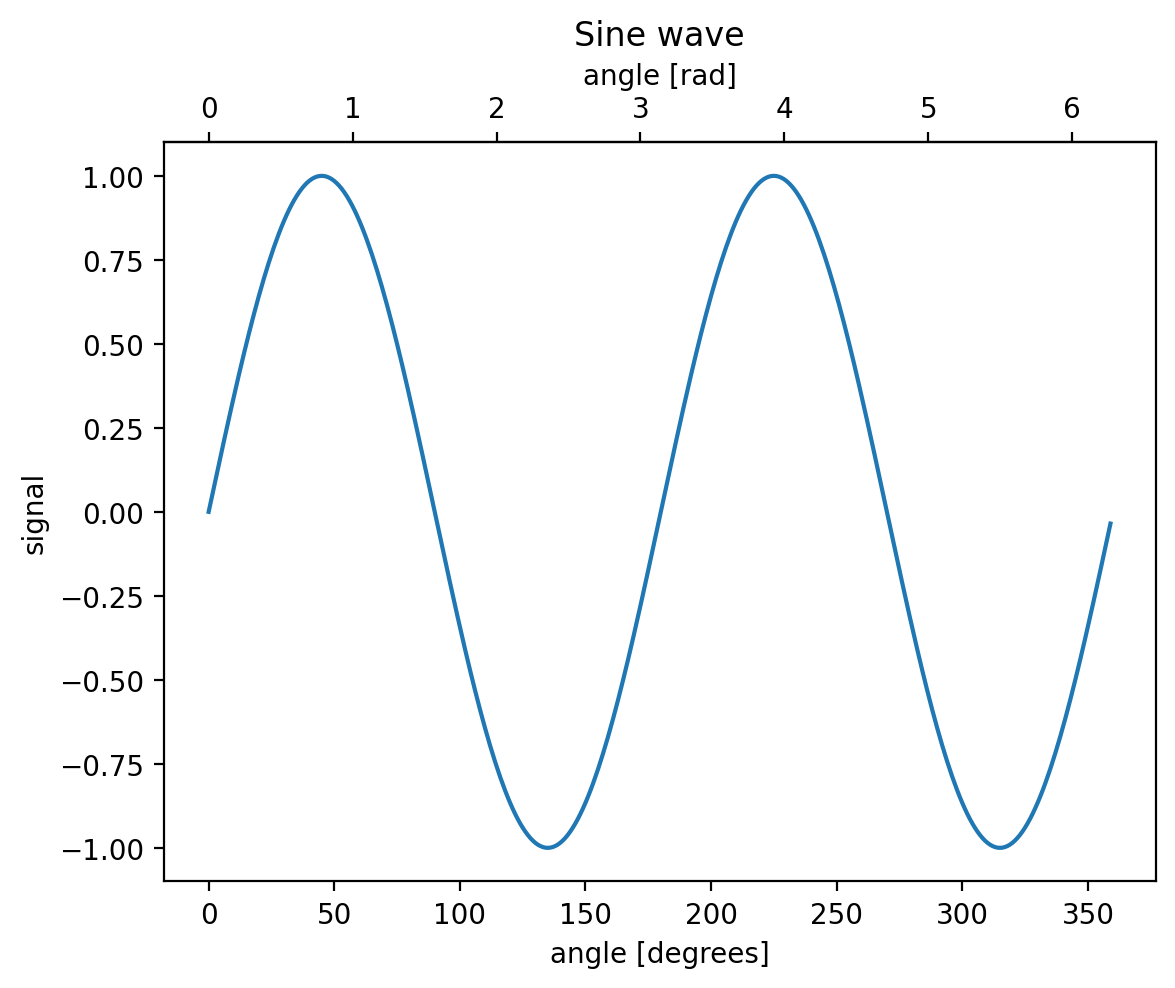

In [25]:
def deg2rad(x):
    return x * np.pi / 180

def rad2deg(x):
    return x * 180 / np.pi

fig, ax = plt.subplots()

x = np.arange(0, 360)
y = np.sin(2 * x * np.pi / 180)

ax.plot(x, y)
ax.set_xlabel('angle [degrees]')
ax.set_ylabel('signal')
ax.set_title('Sine wave')

secax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg)) # 위 쪽에 x축을 추가.
secax.set_xlabel('angle [rad]')

## etc

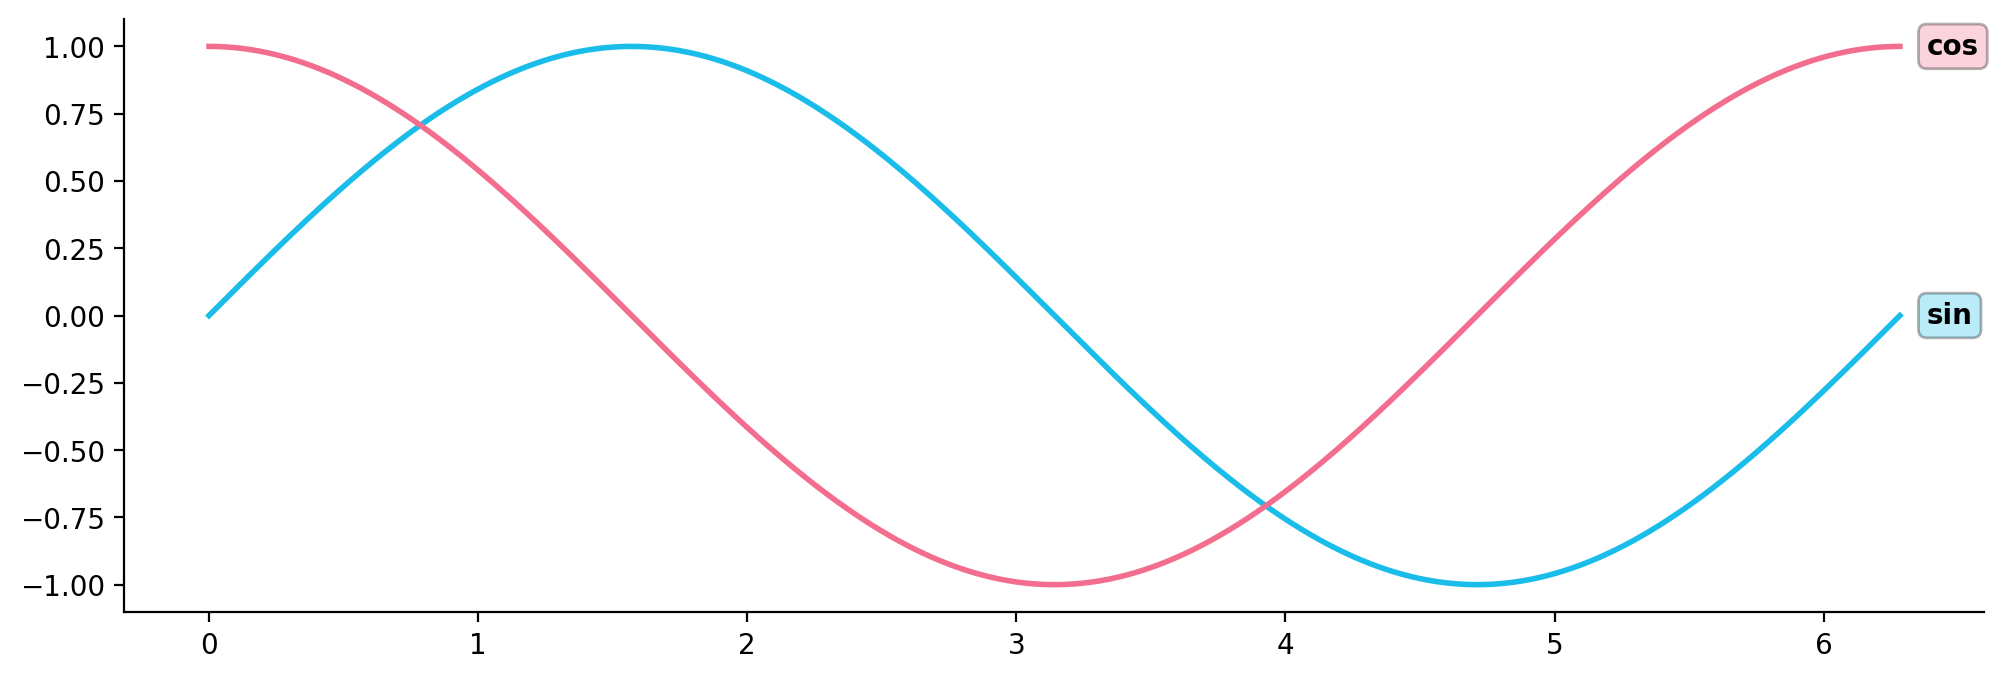

In [32]:
fig = plt.figure(figsize=(12, 5))

x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

ax = fig.add_subplot(111, aspect=1)
ax.plot(x, y1, color='#1ABDE9', linewidth=2,)

ax.plot(x, y2, color='#F36E8E', linewidth=2,)

ax.text(x[-1]+0.1, y1[-1], s='sin', fontweight='bold', va='center', ha='left', bbox=dict(boxstyle='round,pad=0.3', fc='#1ABDE9', ec='black', alpha=0.3))

ax.text(x[-1]+0.1, y2[-1], s='cos', fontweight='bold', va='center', ha='left', bbox=dict(boxstyle='round,pad=0.3', fc='#F36E8E', ec='black', alpha=0.3))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

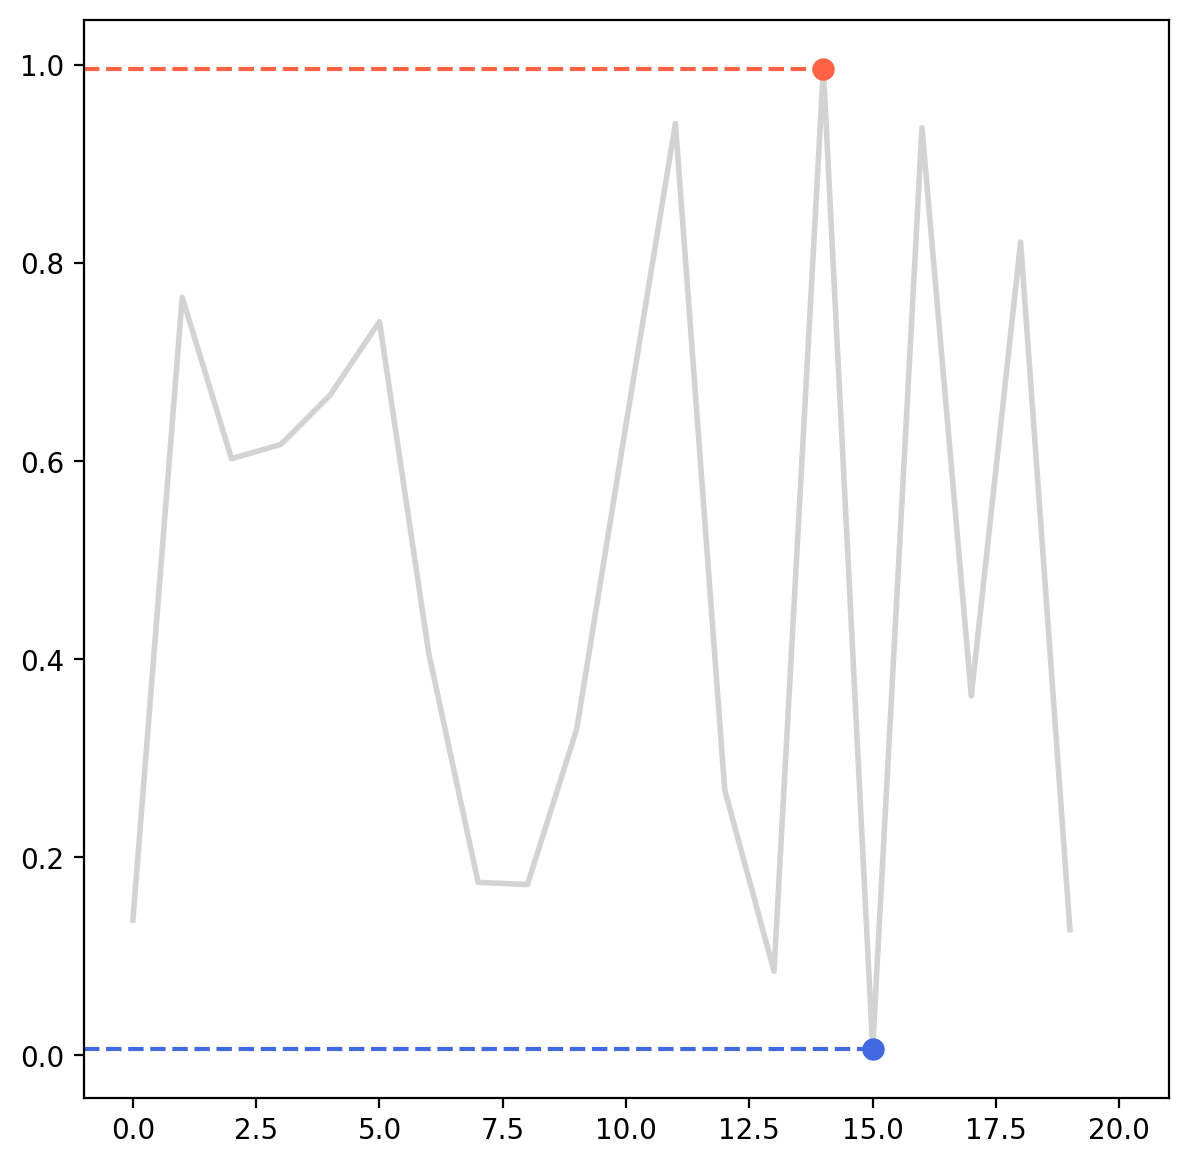

In [33]:
fig = plt.figure(figsize=(7, 7))

x = np.arange(20)
y = np.random.rand(20)

ax = fig.add_subplot(111)
ax.plot(x, y, color='lightgray', linewidth=2)

ax.set_xlim(-1, 21)


ax.plot([-1, x[np.argmax(y)]], [np.max(y)]*2, linestyle='--', color='tomato')
ax.scatter(x[np.argmax(y)], np.max(y), c='tomato',s=50, zorder=20)

ax.plot([-1, x[np.argmin(y)]], [np.min(y)]*2, linestyle='--', color='royalblue')
ax.scatter(x[np.argmin(y)], np.min(y), c='royalblue',s=50, zorder=20)